In [2]:
import sklearn.cluster as cluster
import nupack, numpy as np, matplotlib.pyplot as plt
%matplotlib inline
import time
import random, scipy
from clustering_prototype import pull_state_samples, kmeans_init, kmeans, find_cluster_mfe, minibatchkmeans, run_clustering

In [47]:
# sequence = ('GUGCAUGCCAGUCAUUUGCUGUAGCCUCUGCGCUC')
sequence = ('GUGCAUGCCAGGGCUCAUGCCCAUGCUCAUGUCAUUUGCUGUAGCCUCUGCGCUCGGCUCAUGCCCAUGCUCAUG')

In [48]:
len(sequence)

75

In [49]:
sample_number = 1000000
k = 2
iter_num = 4
batch_size = round(sample_number / 100)

samples_state, samples_pairs = pull_state_samples(sample_number, sequence, model=nupack.Model(gt = True))
init_cluster_centers = kmeans_init(k, sample_number, samples_pairs)

In [50]:
# K-Means
start = time.time()
clustered_states, clustered_state_list, convergence_sums = kmeans(k, samples_pairs, samples_state, init_cluster_centers, sample_number)
cluster_mfe_states = find_cluster_mfe(k, clustered_states, samples_state)
end = time.time()
kmeans_time = end - start
print('CPU time',kmeans_time)

# Mini-Batch K-Means
start = time.time()
clustered_states_batch, clustered_state_list_batch, convergence_sums_batch = minibatchkmeans(k, samples_pairs, samples_state, init_cluster_centers, iter_num, batch_size)
cluster_mfe_states_batch = find_cluster_mfe(k, clustered_states_batch, samples_state)
end = time.time()
minibatch_time = end - start
print('CPU time',minibatch_time)

print('K-means convergence sums', convergence_sums)
print('Mini-Batch K-means convergence sums', convergence_sums_batch)
print('Relative error with 1 iteration:', convergence_sums_batch / convergence_sums[-1])

print(cluster_mfe_states)
print(cluster_mfe_states_batch)

CPU time 572.0354380607605
CPU time 4.979248046875
K-means convergence sums [73127975.0, 73134402.0, 73134427.0, 73134412.0, 73134406.0, 73134459.0, 73134468.0, 73134472.0, 73134472.0]
Mini-Batch K-means convergence sums [731354.0, 729846.0, 728221.0, 731309.0]
Relative error with 1 iteration: [0.01000013 0.00997951 0.00995729 0.00999951]
[State('GTGCATGCCAGGGCTCATGCCCATGCTCATGTCATTTGCTGTAGCCTCTGCGCTCGGCTCATGCCCATGCTCATG', '......((..((((....))))..)).((((.(((..((((.(((......)))))))..)))..))))......', -18.4), State('GTGCATGCCAGGGCTCATGCCCATGCTCATGTCATTTGCTGTAGCCTCTGCGCTCGGCTCATGCCCATGCTCATG', '..((((....((((....)))))))).((((.(((..((((.(((......)))))))..)))..))))......', -18.8)]
[State('GTGCATGCCAGGGCTCATGCCCATGCTCATGTCATTTGCTGTAGCCTCTGCGCTCGGCTCATGCCCATGCTCATG', '......((..((((....))))..)).((((.(((..((((.(((......)))))))..)))..))))......', -18.4), State('GTGCATGCCAGGGCTCATGCCCATGCTCATGTCATTTGCTGTAGCCTCTGCGCTCGGCTCATGCCCATGCTCATG', '..((((....((((....)))))))).((((.(((..((((.(((......))))

In [45]:
clustered_state_list, cluster_mfe_states, convergence_sums = run_clustering(3, sequence, 10000, iter_num=4, minibatch = True)

Cluster MFEs:
[State('GCGTCGCGTCGCTATGC', '((((.((...)).))))', -4.1), State('GCGTCGCGTCGCTATGC', '((((...).))).....', -0.7), State('GCGTCGCGTCGCTATGC', '.....((((....))))', -1.5)]


In [ ]:
# Some Notes
# for sequence = ('GCGUCGCGUCGCUAUGC',): count = (all three: 5), (two: 3), (one: 2) w/o optimization (1,000 states, 50 iterations)
                # 10,000 states, 10 iterations: count = (all three: ), (two: 10), (one: )
    # with more states, less iterations, results are 100% consistent on # of "correct" states recovered
    # with mini-batch, 10,000 states, 4 iterations: count = (all three: 2), (two: 6), (one: 2)
        # duplicates because of k-means not converging yet?

In [ ]:
# Found the most stable macrostate MFE structure!!

In [55]:
# CPU time data from testing different systems

# sequence = ('GCGUCGCGUCGCUAUGC',)
# Mini-batch CPU time/K-means CPU time
# Iterations: 1 to 7
kmeans_cpu_17 = np.array([1.8043739795684814, 1.2250378131866455, 1.5119717121124268, 1.2317638397216797, 2.210700035095215, 1.2416701316833496, 1.8310489654541016])
minibatch_cpu_17 = np.array([0.0454866886138916, 0.1435849666595459, 0.11021590232849121, 0.14110994338989258, 0.1689317226409912, 0.19360685348510742, 0.2335059642791748])
cpu_ratio_17 = minibatch_cpu_17 / kmeans_cpu_17
print('17 nucleotides',cpu_ratio_17)

# sequence = ('GGAACUGGCUAUGCCUCCUCC')
# Mini-batch CPU time/K-means CPU time
# Iterations: 1 to 7
kmeans_cpu_21 = np.array([4.693084001541138, 5.579602956771851, 3.9935169219970703, 4.11980414390564, 7.134518146514893, 5.669832944869995, 4.8142242431640625])
minibatch_cpu_21 = np.array([0.11174416542053223, 0.1833820343017578, 0.26141881942749023, 0.33388209342956543, 0.41259312629699707, 0.4790031909942627, 0.5672168731689453])
cpu_ratio_21 = minibatch_cpu_21 / kmeans_cpu_21
print('21 nucleotides',cpu_ratio_21)

# sequence = ('GCGUGAACAUCUGGACAGUAUCUGUCCUCACGCUCACGC')
# Mini-batch CPU time/K-means CPU time
# Iterations: 1 to 7
kmeans_cpu_39 = np.array([36.07826805114746, 66.88409495353699, 47.249391078948975, 48.033771991729736, 48.08914041519165, 18.23100709915161, 59.676422119140625])
minibatch_cpu_39 = np.array([0.7094283103942871, 1.3281660079956055, 1.9610710144042969, 3.266515016555786, 3.1987080574035645, 3.7106921672821045, 5.0225536823272705])
cpu_ratio_39 = minibatch_cpu_39 / kmeans_cpu_39
print('39 nucleotides',cpu_ratio_39)

kmeans_cpu_20 = np.array([3.718183994293213, 2.5254967212677, 3.4236631393432617, 3.817439079284668, 4.8717522621154785, 3.7436022758483887, 3.0930681228637695])
minibatch_cpu_20 = np.array([0.09562397003173828, 0.14959001541137695, 0.21205615997314453, 0.30402374267578125, 0.3229098320007324, 0.3993349075317383, 0.4647817611694336])
cpu_ratio_20 = minibatch_cpu_20 / kmeans_cpu_20
print('20 nucleotides',cpu_ratio_20)

kmeans_cpu_35 = np.array([56.560606956481934, 50.93304395675659, 44.34599208831787, 71.55460405349731, 42.67946910858154, 36.880359172821045, 73.31213092803955])
minibatch_cpu_35 = np.array([0.7279419898986816, 1.4308831691741943, 1.9437639713287354, 2.609733819961548, 3.210175037384033, 3.7813398838043213, 5.132591009140015])
cpu_ratio_35 = minibatch_cpu_35 / kmeans_cpu_35
print('35 nucleotides',cpu_ratio_35)

sequence_length = np.array([17,20,21,35,39,75])
kmeans_cpu = [kmeans_cpu_17, kmeans_cpu_20, kmeans_cpu_21, kmeans_cpu_35, kmeans_cpu_39]
minibatch_cpu_4 = [minibatch_cpu_17[3], minibatch_cpu_20[3], minibatch_cpu_21[3], minibatch_cpu_35[3], minibatch_cpu_39[3]]
minibatch_cpu_5 = [minibatch_cpu_17[4], minibatch_cpu_20[4], minibatch_cpu_21[4], minibatch_cpu_35[4], minibatch_cpu_39[4]]
# CPU time 384.4477732181549
# CPU time 28.759934902191162
# CPU time 511.4430010318756
# CPU time 5.822467803955078

17 nucleotides [0.02520912 0.1172086  0.07289548 0.11455925 0.07641549 0.15592455
 0.12752579]
21 nucleotides [0.02381039 0.0328665  0.0654608  0.0810432  0.05783055 0.08448277
 0.11782103]
39 nucleotides [0.01966359 0.01985773 0.04150468 0.06800455 0.06651622 0.20353742
 0.08416312]
20 nucleotides [0.02571792 0.05923192 0.06193838 0.07964076 0.06628207 0.1066713
 0.15026561]
35 nucleotides [0.01287012 0.02809342 0.04383178 0.03647192 0.07521591 0.10252991
 0.07001012]


Text(0, 0.5, 'mini-batch CPU time / k-means CPU time')

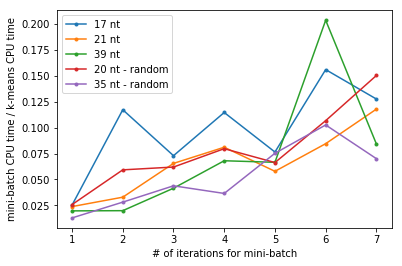

In [28]:
# Plot of ratios of CPU time

iterations = np.linspace(1,7,7)
plt.plot(iterations, cpu_ratio_17, marker = '.', label = '17 nt')
plt.plot(iterations, cpu_ratio_21, marker = '.', label = '21 nt')
plt.plot(iterations, cpu_ratio_39, marker = '.', label = '39 nt')
plt.plot(iterations, cpu_ratio_20, marker = '.', label = '20 nt - random')
plt.plot(iterations, cpu_ratio_35, marker = '.', label = '35 nt - random')

plt.legend()
plt.xlabel('# of iterations for mini-batch')
plt.ylabel('mini-batch CPU time / k-means CPU time')

In [16]:
kmeans_cpu_avg = np.append(kmeans_cpu_avg,np.mean([384.4477732181549, 511.4430010318756]))

array([  1.5795095 ,   3.59902937,   5.14351191,  51.11832319,
        46.32029939, 447.94538713])

Text(0.5, 1.0, 'Clustering CPU Time vs. Sequence Length')

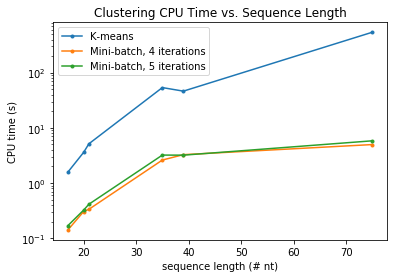

In [56]:
kmeans_cpu_avg = np.mean(kmeans_cpu, axis=1)
kmeans_cpu_avg = np.append(kmeans_cpu_avg,np.mean([511.4430010318756, 572.0354380607605]))
minibatch_cpu_4 = np.append(minibatch_cpu_4,  4.979248046875)
minibatch_cpu_5 = np.append(minibatch_cpu_5, 5.822467803955078)
plt.plot(sequence_length, kmeans_cpu_avg, marker = '.', label = 'K-means')
plt.plot(sequence_length, minibatch_cpu_4, marker = '.', label = 'Mini-batch, 4 iterations')
plt.plot(sequence_length, minibatch_cpu_5, marker = '.', label = 'Mini-batch, 5 iterations')
plt.legend()
plt.yscale('log')
plt.xlabel('sequence length (# nt)')
plt.ylabel('CPU time (s)')
plt.title('Clustering CPU Time vs. Sequence Length')

In [51]:
# loading data from different runs, calculating relative error values

# sequence = ('GCGUCGCGUCGCUAUGC',)
# Mini-batch convergence sums/K-means final convergence sum
# Iterations: 1 to 7
kmeans_sum_17 = np.array([[73881.0, 74932.0, 74928.0, 74929.0, 74928.0, 74928.0], [73619.0, 74926.0, 74927.0, 74927.0], [73091.0, 75030.0, 75025.0, 75024.0, 75024.0], [73836.0, 75002.0, 75001.0, 75001.0], [69852.0, 70128.0, 70125.0, 70119.0, 70129.0, 70128.0, 70128.0], [74004.0, 75019.0, 75002.0, 75002.0], [73331.0, 75022.0, 75020.0, 75021.0, 75020.0, 75020.0]])
minibatch_sum_17 = np.array([[7492.0], [7495.0, 6801.0], [7503.0, 5781.0, 7503.0], [7500.0, 7411.0, 7476.0, 7462.0], [7012.0, 6794.0, 7009.0, 7015.0, 7022.0], [7500.0, 7012.0, 7481.0, 7513.0, 7498.0, 7494.0], [7502.0, 7503.0, 7500.0, 7507.0, 7502.0, 7502.0, 7503.0]])
kmeans_error_17 = [(1 - np.array(kmeans_sum_17[n]) / kmeans_sum_17[n][-1]) for n in range(len(kmeans_sum_17))]
minibatch_error_17 = [(1 - 10 * np.array(minibatch_sum_17[n]) / kmeans_sum_17[n][-1]) for n in range(len(kmeans_sum_17))]
minibatch_lastiter_error_17 = [minibatch_error_17[m][-1] for m in range(7)]
# print(kmeans_error_17)
# print(minibatch_error_17)
# print(minibatch_lastiter_error_17)

# sequence = ('GGAACUGGCUAUGCCUCCUCC')
# Mini-batch convergence sums/K-means final convergence sum
# Iterations: 1 to 7
kmeans_sum_21 = np.array([[182258.0, 188606.0, 190140.0, 190137.0, 190139.0, 190139.0], [185604.0, 189659.0, 189687.0, 189688.0, 189691.0, 189693.0, 189693.0], [183506.0, 185191.0, 185194.0, 185195.0, 185195.0], [186311.0, 185799.0, 185801.0, 185800.0, 185800.0], [192175.0, 195180.0, 195185.0, 195190.0, 195187.0, 195185.0, 195182.0, 195185.0, 195185.0], [181878.0, 184810.0, 184803.0, 184805.0, 184808.0, 184809.0, 184809.0], [182842.0, 189944.0, 190010.0, 190009.0, 190007.0, 190007.0]])
minibatch_sum_21 = np.array([[19008.0], [18969.0, 17975.0], [18501.0, 18006.0, 18540.0], [18581.0, 18509.0, 18104.0, 18494.0], [19529.0, 18988.0, 18953.0, 6962.0, 18956.0], [18464.0, 6814.0, 17488.0, 18523.0, 18539.0, 18004.0], [19000.0, 17967.0, 17986.0, 18976.0, 18966.0, 6921.0, 18973.0]])
kmeans_error_21 = [(1 - np.array(kmeans_sum_21[n]) / kmeans_sum_21[n][-1]) for n in range(len(kmeans_sum_21))]
minibatch_error_21 = [(1 - 10 * np.array(minibatch_sum_21[n]) / kmeans_sum_21[n][-1]) for n in range(len(kmeans_sum_21))]
kmeans_lastiter_error_21 = [kmeans_error_21[j][-1] for j in range(len(kmeans_sum_21))]
minibatch_lastiter_error_21 = [minibatch_error_21[m][-1] for m in range(7)]
# print(kmeans_error_21)
# print(minibatch_error_21)
print(kmeans_lastiter_error_21)

# sequence = ('GCGUGAACAUCUGGACAGUAUCUGUCCUCACGCUCACGC')
# Mini-batch convergence sums/K-means final convergence sum
# Iterations: 1 to 7
kmeans_sum_39 = np.array([[3557425.0, 3562376.0, 3562392.0, 3562388.0, 3562393.0, 3562393.0], [3508733.0, 3507061.0, 3507086.0, 3551671.0, 3568055.0, 3568057.0, 3568051.0, 3568049.0, 3568050.0, 3568051.0, 3568051.0], [3601464.0, 3660409.0, 3660402.0, 3660413.0, 3660418.0, 3660420.0, 3660424.0, 3660424.0], [3586589.0, 3679010.0, 3699914.0, 3699918.0, 3699927.0, 3699924.0, 3699926.0, 3699926.0], [3514032.0, 3564214.0, 3561062.0, 3561083.0, 3561084.0, 3561082.0, 3561088.0, 3561088.0], [3564722.0, 3660757.0, 3660757.0], [3574280.0, 3660803.0, 3660842.0, 3660838.0, 3660839.0, 3660840.0, 3660844.0, 3660847.0, 3660848.0, 3660848.0]])
minibatch_sum_39 = np.array([[356161.0], [356902.0, 350737.0], [366042.0, 366031.0, 365985.0], [369992.0, 370000.0, 369993.0, 369988.0], [356132.0, 231522.0, 356172.0, 356132.0, 356121.0], [366055.0, 366136.0, 366145.0, 192147.0, 356028.0, 356101.0], [366111.0, 366124.0, 366195.0, 366137.0, 366063.0, 71578.0, 356121.0]])
kmeans_error_39 = [(1 - np.array(kmeans_sum_39[n]) / kmeans_sum_39[n][-1]) for n in range(len(kmeans_sum_39))]
minibatch_error_39 = [(1 - 10 * np.array(minibatch_sum_39[n]) / kmeans_sum_39[n][-1]) for n in range(len(kmeans_sum_39))]
minibatch_lastiter_error_39 = [minibatch_error_39[m][-1] for m in range(7)]
# print(kmeans_error_39)
# print(minibatch_error_39)

kmeans_sum_20 = np.array([[179248.0, 180128.0, 180142.0, 180139.0, 180139.0], [179195.0, 180127.0, 180168.0, 180168.0], [172760.0, 180171.0, 180155.0, 180168.0, 180168.0], [177464.0, 180217.0, 180228.0, 180229.0, 180231.0, 180231.0], [184581.0, 189428.0, 189488.0, 189486.0, 189357.0, 189368.0, 189367.0, 189367.0], [174670.0, 180152.0, 180150.0, 180151.0, 180149.0, 180149.0], [178622.0, 180341.0, 180344.0, 180343.0, 180343.0]])
kmeans_sum_20_4 = np.array([[177464.0, 180217.0, 180228.0, 180229.0, 180231.0, 180231.0], [176362.0, 180099.0, 180153.0, 180156.0, 180157.0, 180157.0], [179177.0, 180088.0, 180189.0, 180208.0, 180208.0], [170047.0, 170595.0, 170593.0, 170593.0]])
kmeans_sum_20_5 = np.array([[184581.0, 189428.0, 189488.0, 189486.0, 189357.0, 189368.0, 189367.0, 189367.0], [178359.0, 180241.0, 180256.0, 180258.0, 180258.0], [178146.0, 180166.0, 180171.0, 180170.0, 180170.0], [177795.0, 180042.0, 180147.0, 180152.0, 180152.0]])
kmeans_error_20 = [(1 - np.array(kmeans_sum_20[n]) / kmeans_sum_20[n][-1]) for n in range(len(kmeans_sum_20))]


minibatch_sum_20 = np.array([[18020.0], [18019.0, 18012.0], [18016.0, 16899.0, 17018.0], [18019.0, 17976.0, 17989.0, 17992.0], [18933.0, 17977.0, 18008.0, 18006.0, 18013.0], [18013.0, 8445.0, 17992.0, 18000.0, 18015.0, 18013.0], [18035.0, 18006.0, 17993.0, 18004.0, 18022.0, 18011.0, 18014.0]])
minibatch_sum_20_4 = np.array([[18019.0, 17976.0, 17989.0, 17992.0], [18014.0, 8244.0, 18008.0, 17994.0], [18025.0, 7209.0, 17996.0, 18025.0], [17057.0, 16960.0, 17040.0, 17067.0]])
minibatch_sum_20_5 = np.array([[18933.0, 17977.0, 18008.0, 18006.0, 18013.0], [18024.0, 18011.0, 18009.0, 17998.0, 18012.0], [18013.0, 18021.0, 18011.0, 18008.0, 18008.0], [18013.0, 14989.0, 17985.0, 17993.0, 18009.0]])
minibatch_error_20 = [(1 - 10 * np.array(minibatch_sum_20[n]) / kmeans_sum_20[n][-1]) for n in range(len(kmeans_sum_20))]
minibatch_error_20_4 = [(1 - 10 * np.array(minibatch_sum_20_4[n]) / kmeans_sum_20_4[n][-1]) for n in range(len(kmeans_sum_20_4))]
minibatch_error_20_5 = [(1 - 10 * np.array(minibatch_sum_20_5[n]) / kmeans_sum_20_5[n][-1]) for n in range(len(kmeans_sum_20_5))]
minibatch_lastiter_error_20 = [minibatch_error_20[m][-1] for m in range(7)]

kmeans_sum_35 = np.array([[3351465.0, 3389894.0, 3389772.0, 3389463.0, 3389509.0, 3389509.0], [3289245.0, 3300059.0, 3300071.0, 3300076.0, 3300075.0, 3300069.0, 3300066.0, 3300066.0], [3281503.0, 3291345.0, 3291355.0, 3291338.0, 3290105.0, 3290034.0, 3290034.0], [3295932.0, 3300044.0, 3300062.0, 3300079.0, 3300081.0, 3300078.0, 3300074.0, 3300072.0, 3300071.0, 3300072.0, 3300074.0, 3300074.0], [3359794.0, 3389056.0, 3389070.0, 3389065.0, 3389073.0, 3389081.0, 3389081.0], [3289484.0, 3300003.0, 3300010.0, 3300007.0, 3300009.0, 3300009.0], [3286888.0, 3289948.0, 3289913.0, 3289920.0, 3289923.0, 3289916.0, 3289912.0, 3289911.0, 3289909.0, 3289911.0, 3289908.0, 3289908.0]])
kmeans_sum_35_4 = np.array([[3295932.0, 3300044.0, 3300062.0, 3300079.0, 3300081.0, 3300078.0, 3300074.0, 3300072.0, 3300071.0, 3300072.0, 3300074.0, 3300074.0], [3381465.0, 3389498.0, 3389516.0, 3389526.0, 3389523.0, 3389523.0], [3295877.0, 3300028.0, 3300034.0, 3300066.0, 3300063.0, 3300059.0, 3300055.0, 3300053.0, 3300056.0, 3300058.0, 3300060.0, 3300062.0, 3300060.0, 3300058.0, 3300059.0, 3300056.0, 3300056.0], [3297809.0, 3299967.0, 3299970.0, 3300002.0, 3300008.0, 3300008.0]])
kmeans_sum_35_5 = np.array([[3359794.0, 3389056.0, 3389070.0, 3389065.0, 3389073.0, 3389081.0, 3389081.0], [3286633.0, 3300048.0, 3300118.0, 3300115.0, 3300115.0], [3291499.0, 3299974.0, 3299996.0, 3300003.0, 3300001.0, 3300002.0, 3300005.0, 3300005.0], [3288172.0, 3300060.0, 3300063.0, 3300061.0, 3300062.0, 3300054.0, 3300061.0, 3300061.0]])
kmeans_error_35 = [(1 - np.array(kmeans_sum_35[n]) / kmeans_sum_35[n][-1]) for n in range(len(kmeans_sum_35))]

minibatch_sum_35 = np.array([[338965.0], [330004.0, 248053.0], [329048.0, 328956.0, 329015.0], [330004.0, 261295.0, 329963.0, 329972.0], [338939.0, 328897.0, 328920.0, 328933.0, 328922.0], [329998.0, 295982.0, 328958.0, 328963.0, 328904.0, 328942.0], [328975.0, 329017.0, 328951.0, 329001.0, 328975.0, 328976.0, 338988.0]])
minibatch_sum_35_4 = np.array([[330004.0, 261295.0, 329963.0, 329972.0], [338942.0, 156126.0, 338902.0, 338923.0], [330009.0, 329896.0, 329872.0, 329990.0], [330001.0, 308635.0, 328891.0, 328946.0]])
minibatch_sum_35_5 = np.array([[338939.0, 328897.0, 328920.0, 328933.0, 328922.0], [330016.0, 328896.0, 328841.0, 328967.0, 328963.0], [329998.0, 324132.0, 328233.0, 328858.0, 328946.0], [330007.0, 209880.0, 328870.0, 328919.0, 328938.0]])
minibatch_error_35 = [(1 - 10 * np.array(minibatch_sum_35[n]) / kmeans_sum_35[n][-1]) for n in range(len(kmeans_sum_35))]
minibatch_error_35_4 = [(1 - 10 * np.array(minibatch_sum_35_4[n]) / kmeans_sum_35_4[n][-1]) for n in range(len(kmeans_sum_35_4))]
minibatch_error_35_5 = [(1 - 10 * np.array(minibatch_sum_35_5[n]) / kmeans_sum_35_5[n][-1]) for n in range(len(kmeans_sum_35_5))]
minibatch_lastiter_error_35 = [minibatch_error_35[m][-1] for m in range(7)]



[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [36]:
lengths_17 = [len(kmeans_error_17[n]) for n in range(len(kmeans_error_17))]
max_length_17 = len(kmeans_error_17[np.argmax(lengths_17)])

kmeans_error_17_avg = np.zeros(max_length_17)
kmeans_error_17_std = np.zeros(max_length_17)

# average error for 17 nt sequence
kmeans_error_17_avg[0:4] = [np.mean([kmeans_error_17[n][m] for n in range(7)]) for m in range(4)]
kmeans_error_17_std[0:4] = [np.std([kmeans_error_17[n][m] for n in range(7)]) for m in range(4)]

kmeans_error_17_avg[4] = np.mean([kmeans_error_17[m][4] for m in list([0,2,4,6])])
kmeans_error_17_std[4] = np.std([kmeans_error_17[m][4] for m in list([0,2,4,6])])

kmeans_error_17_avg[5] = np.mean([kmeans_error_17[m][5] for m in list([0,4,6])])
kmeans_error_17_std[5] = np.std([kmeans_error_17[m][5] for m in list([0,4,6])])
kmeans_error_17_avg[5] = 0
kmeans_error_17_std[5] = 0

lengths_21 = [len(kmeans_error_21[n]) for n in range(len(kmeans_error_21))]
max_length_21 = len(kmeans_error_21[np.argmax(lengths_21)])

kmeans_error_21_avg = np.zeros(max_length_21)
kmeans_error_21_std = np.zeros(max_length_21)

# average error for 21 nt sequence
kmeans_error_21_avg[0:5] = [np.mean([kmeans_error_21[n][m] for n in range(7)]) for m in range(5)]
kmeans_error_21_std[0:5] = [np.std([kmeans_error_21[n][m] for n in range(7)]) for m in range(5)]

kmeans_error_21_avg[5] = np.mean([kmeans_error_21[m][5] for m in list([0,1,4,5,6])])
kmeans_error_21_std[5] = np.std([kmeans_error_21[m][5] for m in list([0,1,4,5,6])])

kmeans_error_21_avg[6] = np.mean([kmeans_error_21[m][6] for m in list([1,4,5])])
kmeans_error_21_std[6] = np.std([kmeans_error_21[m][6] for m in list([1,4,5])])

lengths_39 = [len(kmeans_error_39[n]) for n in range(len(kmeans_error_39))]
max_length_39 = len(kmeans_error_39[np.argmax(lengths_39)])

kmeans_error_39_avg = np.zeros(max_length_39)
kmeans_error_39_std = np.zeros(max_length_39)

# average error for 39 nt sequence
kmeans_error_39_avg[0:3] = [np.mean([kmeans_error_39[n][m] for n in range(7)]) for m in range(3)]
kmeans_error_39_std[0:3] = [np.std([kmeans_error_39[n][m] for n in range(7)]) for m in range(3)]

kmeans_error_39_avg[3:6] = [np.mean([kmeans_error_39[n][m] for n in list([0,1,2,3,4,6])]) for m in list([3,4,5])]
kmeans_error_39_std[3:6] = [np.std([kmeans_error_39[n][m] for n in list([0,1,2,3,4,6])]) for m in list([3,4,5])]

kmeans_error_39_avg[6:8] = [np.mean([kmeans_error_39[n][m] for n in list([1,2,3,4,6])]) for m in list([6,7])]
kmeans_error_39_std[6:8] = [np.std([kmeans_error_39[n][m] for n in list([1,2,3,4,6])]) for m in list([6,7])]

kmeans_error_39_avg[8:10] = [np.mean([kmeans_error_39[n][m] for n in list([1,6])]) for m in list([8,9])]
kmeans_error_39_std[8:10] = [np.std([kmeans_error_39[n][m] for n in list([1,6])]) for m in list([8,9])]

kmeans_error_39_avg[10] = 0.0
kmeans_error_39_std[10] = 0.0

In [32]:
lengths_20 = [len(kmeans_error_20[n]) for n in range(len(kmeans_error_20))]
max_length_20 = len(kmeans_error_20[np.argmax(lengths_20)])
print(max_length_20)

kmeans_error_20_avg = np.zeros(max_length_20)
kmeans_error_20_std = np.zeros(max_length_20)

kmeans_error_20_avg[0:4] = [np.mean([kmeans_error_20[n][m] for n in range(7)]) for m in range(4)]
kmeans_error_20_std[0:4] = [np.std([kmeans_error_20[n][m] for n in range(7)]) for m in range(4)]

kmeans_error_20_avg[4] = np.mean([kmeans_error_20[m][4] for m in list([0,2,3,4,5,6])])
kmeans_error_20_std[4] = np.std([kmeans_error_20[m][4] for m in list([0,2,3,4,5,6])])

kmeans_error_20_avg[5] = np.mean([kmeans_error_20[m][5] for m in list([3,4,5])])
kmeans_error_20_std[5] = np.std([kmeans_error_20[m][5] for m in list([3,4,5])])

lengths_35 = [len(kmeans_error_35[n]) for n in range(len(kmeans_error_35))]
max_length_35 = len(kmeans_error_35[np.argmax(lengths_35)])
print(lengths_35)

kmeans_error_35_avg = np.zeros(max_length_35)
kmeans_error_35_std = np.zeros(max_length_35)

kmeans_error_35_avg[0:6] = [np.mean([kmeans_error_35[n][m] for n in range(7)]) for m in range(6)]
kmeans_error_35_std[0:6] = [np.std([kmeans_error_35[n][m] for n in range(7)]) for m in range(6)]

kmeans_error_35_avg[6] = np.mean([kmeans_error_35[m][6] for m in list([1,2,3,4,6])])
kmeans_error_35_std[6] = np.std([kmeans_error_35[m][6] for m in list([1,2,3,4,6])])

kmeans_error_35_avg[7] = np.mean([kmeans_error_35[m][7] for m in list([1,3,6])])
kmeans_error_35_std[7] = np.std([kmeans_error_35[m][7] for m in list([1,3,6])])

kmeans_error_35_avg[8:12] = [np.mean([kmeans_error_35[m][n] for m in list([3,6])]) for n in list([8,9,10,11])]
kmeans_error_35_std[8:12] = [np.std([kmeans_error_35[m][n] for m in list([3,6])]) for n in list([8,9,10,11])]


8
[6, 8, 7, 12, 7, 6, 12]


In [33]:
# resizing each row to be the same length
def reshape_rows(error_array, iteration_number):
    error_array = np.array(error_array)
    longest_row = error_array[np.argmax([len(error_array[m]) for m in range(len(error_array))])]
    for n in range(iteration_number):
        while len(error_array[n]) != len(longest_row):
            error_array[n] = np.append(error_array[n], 0.0)
    error_array = np.array([[error_array[n][m] for n in range(iteration_number)] for m in range(len(longest_row))])
    return error_array

In [43]:
# resizing each row to be the same length

# # Mini-batch data
minibatch_error_17 = reshape_rows(minibatch_error_17, 7)
# print(minibatch_error_17)
        
minibatch_error_21 = reshape_rows(minibatch_error_21, 7)
# print(minibatch_error_21)
        
minibatch_error_39 = reshape_rows(minibatch_error_39, 7)
# print(minibatch_error_39)

minibatch_error_20 = reshape_rows(minibatch_error_20,7)

minibatch_error_35 = reshape_rows(minibatch_error_35,7)

# Calculating average error & STD to converge to K-means final sum of distances

minibatch_error_17_avg = np.array([np.mean(minibatch_error_17[n:,n]) for n in range(7)])
minibatch_error_17_std = np.array([np.std(minibatch_error_17[n:,n]) for n in range(7)])

minibatch_error_21_avg = np.array([np.mean(minibatch_error_21[n:,n]) for n in range(7)])
minibatch_error_21_std = np.array([np.std(minibatch_error_21[n:,n]) for n in range(7)])

minibatch_error_39_avg = np.array([np.mean(minibatch_error_39[n:,n]) for n in range(7)])
minibatch_error_39_std = np.array([np.std(minibatch_error_39[n:,n]) for n in range(7)])
# print(minibatch_error_39[1,1:])
# print(minibatch_error_39)


minibatch_error_20_avg = np.array([np.mean(minibatch_error_20[n:,n]) for n in range(7)])
minibatch_error_20_std = np.array([np.std(minibatch_error_20[n:,n]) for n in range(7)])

minibatch_error_35_avg = np.array([np.mean(minibatch_error_35[n:,n]) for n in range(7)])
minibatch_error_35_std = np.array([np.std(minibatch_error_35[n:,n]) for n in range(7)])

Text(0, 0.5, 'Avg. Error Relative to Converged K-means')

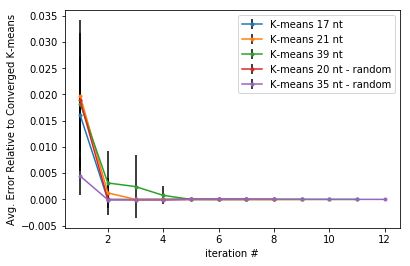

In [37]:
plt.errorbar(np.linspace(1,7,7),kmeans_error_17_avg, yerr = kmeans_error_17_std, ecolor = 'k', marker = '.', color = '#1f77b4',label = 'K-means 17 nt')
plt.errorbar(np.linspace(1,9,9),kmeans_error_21_avg, yerr = kmeans_error_21_std, ecolor = 'k', marker = '.', color = '#ff7f0e',label = 'K-means 21 nt')
plt.errorbar(np.linspace(1,11,11),kmeans_error_39_avg, yerr = kmeans_error_39_std, ecolor = 'k', marker = '.', color = '#2ca02c',label = 'K-means 39 nt')
plt.errorbar(np.linspace(1,max_length_20,max_length_20),kmeans_error_20_avg, yerr = kmeans_error_20_std, ecolor = 'k', marker = '.', color = '#d62728',label = 'K-means 20 nt - random')
plt.errorbar(np.linspace(1,max_length_35,max_length_35),kmeans_error_35_avg, yerr = kmeans_error_35_std, ecolor = 'k', marker = '.', color = '#9467bd',label = 'K-means 35 nt - random')

plt.legend()
plt.xlabel('iteration #')
plt.ylabel('Avg. Error Relative to Converged K-means')
# plt.yscale('log')

Text(0, 0.5, 'Avg. Error Relative to Converged K-means')

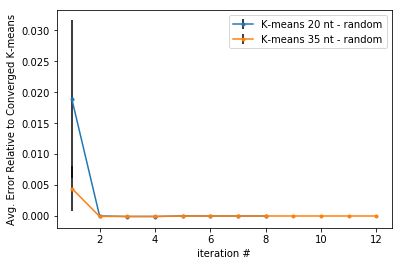

In [44]:
plt.errorbar(np.linspace(1,max_length_20,max_length_20),kmeans_error_20_avg, yerr = kmeans_error_20_std, ecolor = 'k', marker = '.', color = '#1f77b4',label = 'K-means 20 nt - random')
plt.errorbar(np.linspace(1,max_length_35,max_length_35),kmeans_error_35_avg, yerr = kmeans_error_35_std, ecolor = 'k', marker = '.', color = '#ff7f0e',label = 'K-means 35 nt - random')
plt.legend()
plt.xlabel('iteration #')
plt.ylabel('Avg. Error Relative to Converged K-means')
# plt.yscale('log')

Text(0, 0.5, 'Avg. Error Relative to Converged K-means')

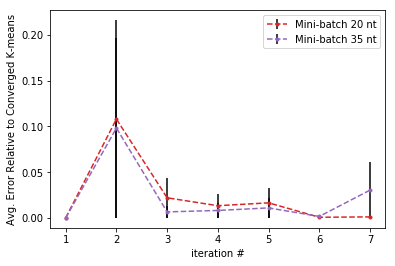

In [801]:
plt.errorbar(iterations,np.abs(minibatch_error_20_avg), yerr = minibatch_error_20_avg, ecolor = 'k', marker = '.', color = '#d62728', linestyle = '--',label = 'Mini-batch 20 nt - random')
plt.errorbar(iterations,np.abs(minibatch_error_35_avg), yerr = minibatch_error_35_avg, ecolor = 'k', marker = '.', color = '#9467bd', linestyle = '--',label = 'Mini-batch 35 nt - random')

plt.legend()
plt.xlabel('iteration #')
plt.ylabel('Avg. Error Relative to Converged K-means')

Text(0, 0.5, 'Avg. Error Relative to Converged K-means')

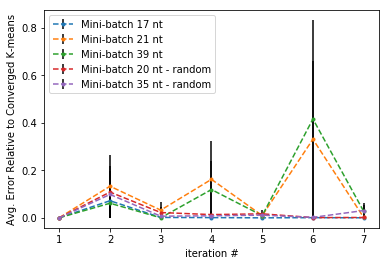

In [46]:
plt.errorbar(iterations,minibatch_error_17_avg, yerr = minibatch_error_17_avg, ecolor = 'k', marker = '.', color = '#1f77b4', linestyle = '--',label = 'Mini-batch 17 nt')
plt.errorbar(iterations,minibatch_error_21_avg, yerr = minibatch_error_21_avg, ecolor = 'k', marker = '.', color = '#ff7f0e', linestyle = '--',label = 'Mini-batch 21 nt')
plt.errorbar(iterations,minibatch_error_39_avg, yerr = minibatch_error_39_avg, ecolor = 'k', marker = '.', color = '#2ca02c', linestyle = '--',label = 'Mini-batch 39 nt')
plt.errorbar(iterations,np.abs(minibatch_error_20_avg), yerr = minibatch_error_20_avg, ecolor = 'k', marker = '.', color = '#d62728', linestyle = '--',label = 'Mini-batch 20 nt - random')
plt.errorbar(iterations,np.abs(minibatch_error_35_avg), yerr = minibatch_error_35_avg, ecolor = 'k', marker = '.', color = '#9467bd', linestyle = '--',label = 'Mini-batch 35 nt - random')

plt.legend(loc=2)
plt.xlabel('iteration #')
plt.ylabel('Avg. Error Relative to Converged K-means')

Text(0, 0.5, 'Error Relative to Converged K-means')

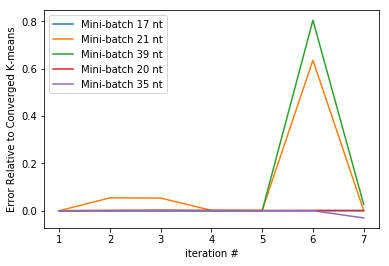

In [60]:
plt.plot(iterations,minibatch_error_17[6], label = 'Mini-batch 17 nt')
plt.plot(iterations,minibatch_error_21[6], label = 'Mini-batch 21 nt')
plt.plot(iterations,minibatch_error_39[6], label = 'Mini-batch 39 nt')
plt.plot(iterations,minibatch_error_20[6], label = 'Mini-batch 20 nt')
plt.plot(iterations,minibatch_error_35[6], label = 'Mini-batch 35 nt')
plt.legend(loc=2)
plt.xlabel('iteration #')
plt.ylabel('Error Relative to Converged K-means')


Text(0, 0.5, '| Avg. Error Relative to Converged K-means |')

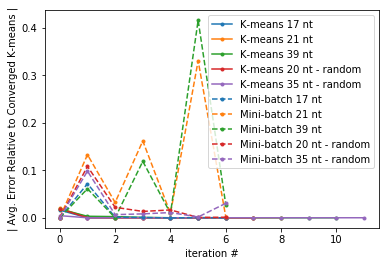

In [804]:
plt.plot(kmeans_error_17_avg, marker = '.', label = 'K-means 17 nt')
plt.plot(kmeans_error_21_avg, marker = '.', label = 'K-means 21 nt')
plt.plot(kmeans_error_39_avg, marker = '.', label = 'K-means 39 nt')
plt.plot(kmeans_error_20_avg, marker = '.', label = 'K-means 20 nt - random')
plt.plot(kmeans_error_35_avg, marker = '.', label = 'K-means 35 nt - random')


plt.plot(minibatch_error_17_avg, marker = '.', color = '#1f77b4', linestyle = '--', label = 'Mini-batch 17 nt')
plt.plot(minibatch_error_21_avg, marker = '.', color = '#ff7f0e', linestyle = '--', label = 'Mini-batch 21 nt')
plt.plot(minibatch_error_39_avg, marker = '.', color = '#2ca02c', linestyle = '--', label = 'Mini-batch 39 nt')
plt.plot(np.abs(minibatch_error_20_avg), marker = '.', color = '#d62728', linestyle = '--', label = 'Mini-batch 20 nt - random')
plt.plot(np.abs(minibatch_error_35_avg), marker = '.', color = '#9467bd', linestyle = '--', label = 'Mini-batch 35 nt - random')

plt.legend()
# plt.yscale('log')
plt.xlabel('iteration #')
plt.ylabel('| Avg. Error Relative to Converged K-means |')

Text(0, 0.5, 'Error Relative to Converged K-means')

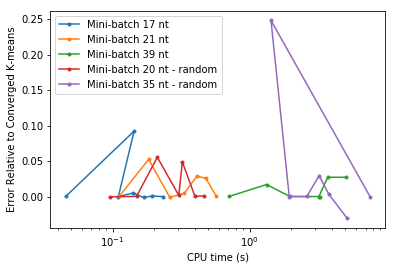

In [809]:
plt.plot(minibatch_cpu_17, minibatch_lastiter_error_17, marker = '.', label = 'Mini-batch 17 nt')
plt.plot(minibatch_cpu_21, minibatch_lastiter_error_21, marker = '.', label = 'Mini-batch 21 nt')
plt.plot(minibatch_cpu_39, minibatch_lastiter_error_39, marker = '.', label = 'Mini-batch 39 nt')
plt.plot(minibatch_cpu_20, minibatch_lastiter_error_20, marker = '.', label = 'Mini-batch 20 nt - random')
plt.plot(minibatch_cpu_35, minibatch_lastiter_error_35, marker = '.', label = 'Mini-batch 35 nt - random')
plt.legend()
plt.xscale('log')
plt.xlabel('CPU time (s)')
plt.ylabel('Error Relative to Converged K-means')

Text(0.5, 1.0, '17 nt sequence')

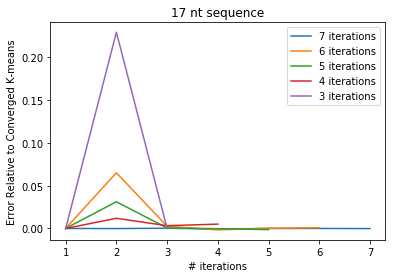

In [526]:
plt.plot(iterations,minibatch_error_17[:,-1], label = '7 iterations')
plt.plot(iterations[:-1],minibatch_error_17[:-1,-2], label = '6 iterations')
plt.plot(iterations[:-2],minibatch_error_17[:-2,-3], label = '5 iterations')
plt.plot(iterations[:-3],minibatch_error_17[:-3,-4], label = '4 iterations')
plt.plot(iterations[:-4],minibatch_error_17[:-4,-5], label = '3 iterations')
plt.legend()
plt.xlabel('# iterations')
plt.ylabel('Error Relative to Converged K-means')
plt.title('17 nt sequence')

Text(0.5, 1.0, '21 nt sequence')

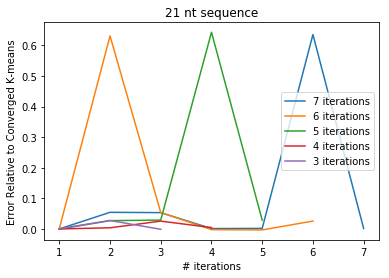

In [525]:
plt.plot(iterations,minibatch_error_21[:,-1], label = '7 iterations')
plt.plot(iterations[:-1],minibatch_error_21[:-1,-2], label = '6 iterations')
plt.plot(iterations[:-2],minibatch_error_21[:-2,-3], label = '5 iterations')
plt.plot(iterations[:-3],minibatch_error_21[:-3,-4], label = '4 iterations')
plt.plot(iterations[:-4],minibatch_error_21[:-4,-5], label = '3 iterations')
plt.legend()
plt.xlabel('# iterations')
plt.ylabel('Error Relative to Converged K-means')
plt.title('21 nt sequence')

Text(0.5, 1.0, '39 nt sequence')

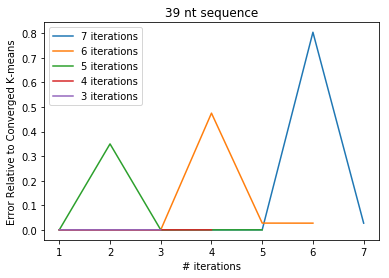

In [524]:
plt.plot(iterations,minibatch_error_39[:,-1], label = '7 iterations')
plt.plot(iterations[:-1],minibatch_error_39[:-1,-2], label = '6 iterations')
plt.plot(iterations[:-2],minibatch_error_39[:-2,-3], label = '5 iterations')
plt.plot(iterations[:-3],minibatch_error_39[:-3,-4], label = '4 iterations')
plt.plot(iterations[:-4],minibatch_error_39[:-4,-5], label = '3 iterations')
plt.legend()
plt.xlabel('# iterations')
plt.ylabel('Error Relative to Converged K-means')
plt.title('39 nt sequence')

In [ ]:
plt.plot(minibatch_cpu_17, minibatch_lastiter_error_17, marker = '.', label = 'Mini-batch 17 nt')
plt.plot(minibatch_cpu_21, minibatch_lastiter_error_21, marker = '.', label = 'Mini-batch 21 nt')
plt.plot(minibatch_cpu_39, minibatch_lastiter_error_39, marker = '.', label = 'Mini-batch 39 nt')
# plt.plot(kmeans_cpu_17, kmeans_lastiter_error_17, marker = '.', label = 'K-means 17 nt')
# plt.plot(kmeans_cpu_21, kmeans_lastiter_error_21, marker = '.', label = 'K-means 21 nt')
# plt.plot(kmeans_cpu_39, kmeans_lastiter_error_39, marker = '.', label = 'K-means 39 nt')
plt.legend()
plt.xscale('log')
plt.xlabel('CPU time (s)')
plt.ylabel('Error Relative to Converged K-means')

In [562]:
# Macrostate Counts

A_17_kmeans = np.array([1,1,0,1,0,1,0])
B_17_kmeans = np.array([1,1,1,1,1,1,1])
C_17_kmeans = np.array([0,0,0,0,1,0,0])
other_17_kmeans = np.array([0,0,1,0,0,0,0])

A_17_minibatch = np.array([1,0,0,1,1,1,0])
B_17_minibatch = np.array([1,1,1,1,1,1,1])
C_17_minibatch = np.array([0,0,0,0,0,0,0])
other_17_minibatch = np.array([0,1,1,0,0,0,0])

A_39_kmeans = np.array([1,1,1,1,1,1,1])
B_39_kmeans = np.array([0,1,0,0,0,0,0])
other_39_kmeans = np.array([1,0,0,1,1,1,1])

A_39_minibatch = np.array([1,1,1,1,1,1,1])
B_39_minibatch = np.array([0,1,0,0,0,0,0])
other_39_minibatch = np.array([1,0,0,0,1,1,1])

A_21_kmeans = np.array([1,1,1,1,1,1,1])
B_21_kmeans = np.array([1,0,1,1,1,1,0])
C_21_kmeans = np.array([0,1,1,0,0,0,1])
other_21_kmeans = np.array([1,0,0,0,0,1,1])

A_21_minibatch = np.array([1,1,1,1,1,1,1])
B_21_minibatch = np.array([1,0,1,1,1,0,0])
C_21_minibatch = np.array([0,1,0,1,0,0,1])
other_21_minibatch = np.array([0,0,0,0,1,2,1])

Text(0.5, 1.0, '17 nt, Macrostates found, Minibatch vs. Kmeans')

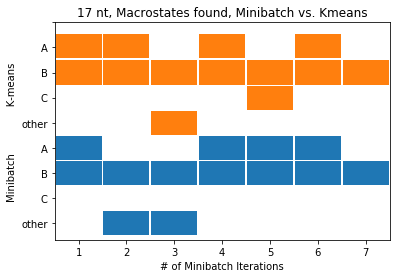

In [710]:
# Macrostates found, Minibatch vs. Kmeans

A_17_kmeans = np.array([1,2,0,4,0,6,0])
B_17_kmeans = np.array([1,2,3,4,5,6,7])
C_17_kmeans = np.array([0,0,0,0,5,0,0])
other_17_kmeans = np.array([0,0,3,0,0,0,0])
# Kmeans_17_data = np.array([A_17_kmeans,B_17_kmeans,C_17_kmeans,other_17_kmeans])

A_17_minibatch = np.array([1,0,0,4,5,6,0])
B_17_minibatch = np.array([1,2,3,4,5,6,7])
C_17_minibatch = np.array([0,0,0,0,0,0,0])
other_17_minibatch = np.array([0,2,3,0,0,0,0])
# Minibatch_17_data = np.array([A_17_minibatch,B_17_minibatch,C_17_minibatch,other_17_minibatch])

mbkm_17_data = np.array([other_17_minibatch,C_17_minibatch,B_17_minibatch,A_17_minibatch,other_17_kmeans,C_17_kmeans,B_17_kmeans,A_17_kmeans])

lineoffsets1 = np.array([0,1.5,3,4.5,6,7.5,9,10.6])
linelengths1 = [1.45,1.45,1.45,1.45,1.45,1.45,1.45,1.45]
colors1 = ['#1f77b4','#1f77b4','#1f77b4','#1f77b4','#ff7f0e','#ff7f0e','#ff7f0e','#ff7f0e']

plt.eventplot(mbkm_17_data, colors = colors1, lineoffsets=lineoffsets1, linelengths=linelengths1, linewidths=46)
labels = np.array(['other','C','B','A','other','C','B','A']) 
plt.yticks(np.arange(10) * 1.5, labels)
plt.xticks(np.arange(1,8))
plt.xlim([0.5,7.5])
plt.ylim([-1,12])
plt.xlabel('# of Minibatch Iterations')
plt.ylabel('Minibatch               K-means')
plt.title('17 nt, Macrostates found, Minibatch vs. Kmeans')

Text(0.5, 1.0, '21 nt, Macrostates found, Minibatch vs. Kmeans')

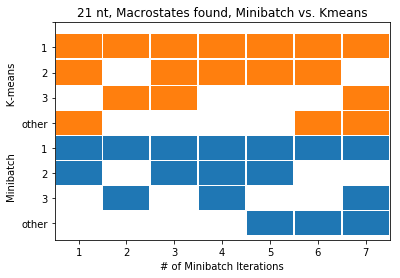

In [709]:
# Macrostates found, Minibatch vs. Kmeans

A_21_kmeans = np.array([1,2,3,4,5,6,7])
B_21_kmeans = np.array([1,0,3,4,5,6,0])
C_21_kmeans = np.array([0,2,3,0,0,0,7])
other_21_kmeans = np.array([1,0,0,0,0,6,7])
# Kmeans_17_data = np.array([A_17_kmeans,B_17_kmeans,C_17_kmeans,other_17_kmeans])

A_21_minibatch = np.array([1,2,3,4,5,6,7])
B_21_minibatch = np.array([1,0,3,4,5,0,0])
C_21_minibatch = np.array([0,2,0,4,0,0,7])
other_21_minibatch = np.array([0,0,0,0,5,6,7])
# Minibatch_17_data = np.array([A_17_minibatch,B_17_minibatch,C_17_minibatch,other_17_minibatch])

mbkm_21_data = np.array([other_21_minibatch,C_21_minibatch,B_21_minibatch,A_21_minibatch,other_21_kmeans,C_21_kmeans,B_21_kmeans,A_21_kmeans])

lineoffsets1 = np.array([0,1.5,3,4.5,6,7.5,9,10.6])
linelengths1 = [1.45,1.45,1.45,1.45,1.45,1.45,1.45,1.45]
colors1 = ['#1f77b4','#1f77b4','#1f77b4','#1f77b4','#ff7f0e','#ff7f0e','#ff7f0e','#ff7f0e']

plt.eventplot(mbkm_21_data, colors = colors1, lineoffsets=lineoffsets1, linelengths=linelengths1, linewidths=46)
labels = np.array(['other','3','2','1','other','3','2','1']) 
plt.yticks(np.arange(10) * 1.5, labels)
plt.xticks(np.arange(1,8))
plt.xlim([0.5,7.5])
plt.ylim([-1,12])
plt.xlabel('# of Minibatch Iterations')
plt.ylabel('Minibatch               K-means')
plt.title('21 nt, Macrostates found, Minibatch vs. Kmeans')

Text(0.5, 1.0, '39 nt, Macrostates found, Minibatch vs. Kmeans')

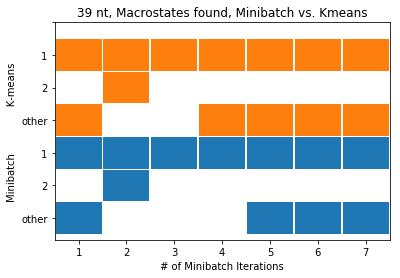

In [711]:
# Macrostates found, Minibatch vs. Kmeans

A_39_kmeans = np.array([1,2,3,4,5,6,7])
B_39_kmeans = np.array([0,2,0,0,0,0,0])
other_39_kmeans = np.array([1,0,0,4,5,6,7])
# Kmeans_17_data = np.array([A_17_kmeans,B_17_kmeans,C_17_kmeans,other_17_kmeans])

A_39_minibatch = np.array([1,2,3,4,5,6,7])
B_39_minibatch = np.array([0,2,0,0,0,0,0])
other_39_minibatch = np.array([1,0,0,0,5,6,7])
# Minibatch_17_data = np.array([A_17_minibatch,B_17_minibatch,C_17_minibatch,other_17_minibatch])

mbkm_39_data = np.array([other_39_minibatch, B_39_minibatch, A_39_minibatch, other_39_kmeans, B_39_kmeans, A_39_kmeans])

lineoffsets1 = np.array([0,1.5,3,4.5,6,7.5])
linelengths1 = [1.45,1.45,1.45,1.45,1.45,1.45]
colors1 = ['#1f77b4','#1f77b4','#1f77b4','#ff7f0e','#ff7f0e','#ff7f0e']

plt.eventplot(mbkm_39_data, colors = colors1, lineoffsets=lineoffsets1, linelengths=linelengths1, linewidths=46)
labels = np.array(['other','2','1','other','2','1']) 
plt.yticks(np.arange(8) * 1.5, labels)
plt.xticks(np.arange(1,8))
plt.xlim([0.5,7.5])
plt.ylim([-1,9])
plt.xlabel('# of Minibatch Iterations')
plt.ylabel('Minibatch               K-means')
plt.title('39 nt, Macrostates found, Minibatch vs. Kmeans')

Text(0.5, 1.0, '39 nt')

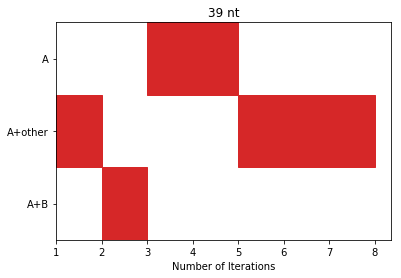

In [573]:
macros_found_39_minibatch = np.array([1, 2, 0, 0, 1, 1, 1])
# macros_found_17_minibatch = np.array([[0,1],[1,3],[1,3],[0,1],[0,1],[0,1],[1]])

# labels = np.array(['A','B','C','Other'])    
labels = np.array(['A','A+other','A+B',])    
plt.barh(macros_found_39_minibatch, [1]*len(minibatch_iteration), left=minibatch_iteration, color = '#d62728', edgecolor = '#d62728', align='center', height=1)
plt.ylim(max(macros_found_39_minibatch)+0.5, min(macros_found_39_minibatch)-0.5)
plt.yticks(np.arange(macros_found_39_minibatch.max()+1), labels)
plt.xlabel('Number of Iterations')
plt.title('39 nt')

In [ ]:
# Data for comparison of K-means, Mini-batch K-means

# sequence = ('GCGUCGCGUCGCUAUGC',)

# sample_number = 5000
# k = 2
# iter_num = 1
# batch_size = round(sample_number / 10)
    
    # CPU time: K-means(1.8043739795684814), Mini-batch(0.0454866886138916)
    # K-means convergence sums [73881.0, 74932.0, 74928.0, 74929.0, 74928.0, 74928.0]
    # Mini-Batch K-means convergence sums [7492.0]``
    # Relative error with 1 iteration: [0.09998932]
    # Same MFE states found:
        #  [State('GCGTCGCGTCGCTATGC', '((((.((...)).))))', -4.1),
        #  State('GCGTCGCGTCGCTATGC', '.....((((....))))', -1.5)]

# sample_number = 5000
# k = 2
# iter_num = 2
# batch_size = round(sample_number / 10)

    # CPU time: K-means(1.2250378131866455), Mini-batch(0.1435849666595459)
    # K-means convergence sums [73619.0, 74926.0, 74927.0, 74927.0]
    # Mini-Batch K-means convergence sums [7495.0, 6801.0]
    # Relative error with 1 iteration: [0.1000307  0.09076835]
    # K-means MFE states found:
        #  [State('GCGTCGCGTCGCTATGC', '((((.((...)).))))', -4.1),
        #  State('GCGTCGCGTCGCTATGC', '.....((((....))))', -1.5)]
    # Mini-batch MFE states found:
        # [State('GCGTCGCGTCGCTATGC', '((((...).))).....', -0.7),
        #  State('GCGTCGCGTCGCTATGC', '((((.((...)).))))', -4.1)]
        
# sample_number = 5000
# k = 2
# iter_num = 3
# batch_size = round(sample_number / 10)

    # CPU time: K-means(1.5119717121124268), Mini-batch(0.11021590232849121)
    # K-means convergence sums [73091.0, 75030.0, 75025.0, 75024.0, 75024.0]
    # Mini-Batch K-means convergence sums [7503.0, 5781.0, 7503.0]
    # Relative error with 1 iteration: [0.100008   0.07705534 0.100008  ]
    # Same MFE states found:
        # [State('GCGTCGCGTCGCTATGC', '((((.((...)).))))', -4.1),
        #  State('GCGTCGCGTCGCTATGC', '((...))..........', -1)]

# sample_number = 5000
# k = 2
# iter_num = 4
# batch_size = round(sample_number / 10)

    # CPU time: K-means(2.210700035095215), Mini-batch(0.1689317226409912)
    # K-means convergence sums [73836.0, 75002.0, 75001.0, 75001.0]
    # Mini-Batch K-means convergence sums [7500.0, 7411.0, 7476.0, 7462.0]
    # Relative error with 1 iteration: [0.09999867 0.09881202 0.09967867 0.09949201]
    # Same MFE states found:
        #  [State('GCGTCGCGTCGCTATGC', '.....((((....))))', -1.5),
        #  State('GCGTCGCGTCGCTATGC', '((((.((...)).))))', -4.1)]

# sample_number = 5000
# k = 2
# iter_num = 5
# batch_size = round(sample_number / 10)

    # CPU time: K-means(1.2317638397216797), Mini-batch(0.14110994338989258)
    # K-means convergence sums [69852.0, 70128.0, 70125.0, 70119.0, 70129.0, 70128.0, 70128.0]
    # Mini-Batch K-means convergence sums [7012.0, 6794.0, 7009.0, 7015.0, 7022.0]
    # Relative error with 1 iteration: [0.09998859 0.09687999 0.09994581 0.10003137 0.10013119]
    # K-means MFE states found:
        #  [State('GCGTCGCGTCGCTATGC', '((((.((...)).))))', -4.1),
        #  State('GCGTCGCGTCGCTATGC', '(((......))).....', -2.6)]
    # Mini-batch MFE states found:
        # [State('GCGTCGCGTCGCTATGC', '((((.((...)).))))', -4.1),
        #  State('GCGTCGCGTCGCTATGC', '.....((((....))))', -1.5)]

# sample_number = 5000
# k = 2
# iter_num = 6
# batch_size = round(sample_number / 10)

    # CPU time: K-means(1.2416701316833496), Mini-batch(0.19360685348510742)
    # K-means convergence sums [74004.0, 75019.0, 75002.0, 75002.0]
    # Mini-Batch K-means convergence sums [7500.0, 7012.0, 7481.0, 7513.0, 7498.0, 7494.0]
    # Relative error with 1 iteration: [0.09999733 0.09349084 0.09974401 0.10017066 0.09997067 0.09991734]
    # Same MFE states found:
        #  [State('GCGTCGCGTCGCTATGC', '((((.((...)).))))', -4.1),
        #  State('GCGTCGCGTCGCTATGC', '.....((((....))))', -1.5)]

# sample_number = 5000
# k = 2
# iter_num = 7
# batch_size = round(sample_number / 10)

    # CPU time: K-means(1.8310489654541016), Mini-batch(0.2335059642791748)
    # K-means convergence sums [73331.0, 75022.0, 75020.0, 75021.0, 75020.0, 75020.0]
    # Mini-Batch K-means convergence sums [7502.0, 7503.0, 7500.0, 7507.0, 7502.0, 7502.0, 7503.0]
    # Relative error with 1 iteration: [0.1 0.10001333 0.09997334 0.10006665 0.1 0.1 0.10001333]
    # Same MFE states found:
        #  [State('GCGTCGCGTCGCTATGC', '((((.((...)).))))', -4.1)]

In [ ]:
# Data for comparison of K-means, Mini-batch K-means

# sequence = ('GGAACUGGCUAUGCCUCCUCC')

# sample_number = 10000
# k = 3
# iter_num = 1
# batch_size = round(sample_number / 10)

    # CPU time: K-means(4.693084001541138), Mini-batch(0.11174416542053223)
    # K-means convergence sums [182258.0, 188606.0, 190140.0, 190137.0, 190139.0, 190139.0]
    # Mini-Batch K-means convergence sums [19008.0]
    # Relative error with 1 iteration: [0.09996897]
    # K-means MFE states found:
        #  [State('GGAACTGGCTATGCCTCCTCC', '((...........))......', -0.7),
        #  State('GGAACTGGCTATGCCTCCTCC', '(((...(((...))))))...', -5.1),
        #  State('GGAACTGGCTATGCCTCCTCC', '(((...(((...)))...)))', -5.2)]
    # Mini-batch MFE states found:
        # [State('GGAACTGGCTATGCCTCCTCC', '(((...(((...))))))...', -5.1),
        #  State('GGAACTGGCTATGCCTCCTCC', '(((...(((...)))...)))', -5.2)]
        
# sample_number = 10000
# k = 3
# iter_num = 2
# batch_size = round(sample_number / 10)

    # CPU time: K-means(5.579602956771851), Mini-batch(0.1833820343017578)
    # K-means convergence sums [185604.0, 189659.0, 189687.0, 189688.0, 189691.0, 189693.0, 189693.0]
    # Mini-Batch K-means convergence sums [18969.0, 17975.0]
    # Relative error with 1 iteration: [0.09999842 0.09475837]
    # Same MFE states found:
        #  [State('GGAACTGGCTATGCCTCCTCC', '(((...(((...)))...)))', -5.2),
        #  State('GGAACTGGCTATGCCTCCTCC', '......(((...)))......', -3.4)]

# sample_number = 10000
# k = 3
# iter_num = 3
# batch_size = round(sample_number / 10)

    # CPU time: K-means(3.9935169219970703), Mini-batch(0.26141881942749023)
    # K-means convergence sums [183506.0, 185191.0, 185194.0, 185195.0, 185195.0]
    # Mini-Batch K-means convergence sums [18501.0, 18006.0, 18540.0]
    # Relative error with 1 iteration: [0.09990011 0.09722725 0.10011069]
    # K-means MFE states found:
        #  [State('GGAACTGGCTATGCCTCCTCC', '(((...(((...)))...)))', -5.2),
        #  State('GGAACTGGCTATGCCTCCTCC', '(((...(((...))))))...', -5.1)]
    # Mini-batch MFE states found:
        # [State('GGAACTGGCTATGCCTCCTCC', '(((...(((...)))...)))', -5.2),
        #  State('GGAACTGGCTATGCCTCCTCC', '......(((...)))......', -3.4),
        #  State('GGAACTGGCTATGCCTCCTCC', '(((...(((...))))))...', -5.1)]
        
# sample_number = 10000
# k = 3
# iter_num = 4
# batch_size = round(sample_number / 10)

    # CPU time: K-means(4.11980414390564), Mini-batch(0.33388209342956543)
    # K-means convergence sums [186311.0, 185799.0, 185801.0, 185800.0, 185800.0]
    # Mini-Batch K-means convergence sums [18581.0, 18509.0, 18104.0, 18494.0]
    # Relative error with 1 iteration: [0.10000538 0.09961787 0.09743811 0.09953714]
    # K-means MFE states found:
        #  [State('GGAACTGGCTATGCCTCCTCC', '......(((...)))......', -3.4),
        #  State('GGAACTGGCTATGCCTCCTCC', '((....(((...)))))....', -0.2),
        #  State('GGAACTGGCTATGCCTCCTCC', '(((...(((...)))...)))', -5.2)]
    # Mini-batch MFE states found:
        # [State('GGAACTGGCTATGCCTCCTCC', '(((...(((...)))...)))', -5.2),
        #  State('GGAACTGGCTATGCCTCCTCC', '((....(((...)))))....', -0.2)]
        
# sample_number = 10000
# k = 3
# iter_num = 5
# batch_size = round(sample_number / 10)

    # CPU time: K-means(7.134518146514893), Mini-batch(0.41259312629699707)
    # K-means convergence sums [192175.0, 195180.0, 195185.0, 195190.0, 195187.0, 195185.0, 195182.0, 195185.0, 195185.0]
    # Mini-Batch K-means convergence sums [19529.0, 18988.0, 18953.0, 6962.0, 18956.0]
    # Relative error with 1 iteration: [0.1000538  0.09728207 0.09710275 0.03566872 0.09711812]
    # K-means MFE states found:
        #  [State('GGAACTGGCTATGCCTCCTCC', '(((...(((...)))...)))', -5.2),
        #  State('GGAACTGGCTATGCCTCCTCC', '(((...(((...))))))...', -5.1)]
    # Mini-batch MFE states found:
        # [State('GGAACTGGCTATGCCTCCTCC', '(((...(((...)))...)))', -5.2),
        #  State('GGAACTGGCTATGCCTCCTCC', '(((...(((...))))))...', -5.1),
        #  State('GGAACTGGCTATGCCTCCTCC', '(((..((....))..)))...', -0.8)]

# sample_number = 10000
# k = 3
# iter_num = 6
# batch_size = round(sample_number / 10)

    # CPU time: K-means(5.669832944869995), Mini-batch(0.4790031909942627)
    # K-means convergence sums [181878.0, 184810.0, 184803.0, 184805.0, 184808.0, 184809.0, 184809.0]
    # Mini-Batch K-means convergence sums [18464.0, 6814.0, 17488.0, 18523.0, 18539.0, 18004.0]
    # Relative error with 1 iteration: [0.09990855 0.0368705  0.09462743 0.1002278  0.10031438 0.0974195 ]
    # K-means MFE states found:
        #  [State('GGAACTGGCTATGCCTCCTCC', '(((...(((...))))))...', -5.1),
        #  State('GGAACTGGCTATGCCTCCTCC', '((....(((...)))...)).', -2.2),
        #  State('GGAACTGGCTATGCCTCCTCC', '(((...(((...)))...)))', -5.2)]
    # Mini-batch MFE states found:
        # [State('GGAACTGGCTATGCCTCCTCC', '(((...(((...)))...)))', -5.2),
        #  State('GGAACTGGCTATGCCTCCTCC', '((...........))......', -0.7),
        #  State('GGAACTGGCTATGCCTCCTCC', '((....(((...)))...)).', -2.2)]

# sample_number = 10000
# k = 3
# iter_num = 7
# batch_size = round(sample_number / 10)

    # CPU time: K-means(4.8142242431640625), Mini-batch(0.5672168731689453)
    # K-means convergence sums [182842.0, 189944.0, 190010.0, 190009.0, 190007.0, 190007.0]
    # Mini-Batch K-means convergence sums [19000.0, 17967.0, 17986.0, 18976.0, 18966.0, 6921.0, 18973.0]
    # Relative error with 1 iteration: [0.09999632 0.09455967 0.09465967 0.09987 0.09981738 0.03642497 0.09985422]
    # Same MFE states found:
        #  [State('GGAACTGGCTATGCCTCCTCC', '......(((...)))......', -3.4),
        #  State('GGAACTGGCTATGCCTCCTCC', '((....(((...)))))....', -0.2),
        #  State('GGAACTGGCTATGCCTCCTCC', '(((...(((...)))...)))', -5.2)]

In [ ]:
# Data for comparison of K-means, Mini-batch K-means

# sequence = ('GCGUGAACAUCUGGACAGUAUCUGUCCUCACGCUCACGC')

# sample_number = 1000000
# k = 2
# iter_num = 1
# batch_size = round(sample_number / 10)

    # CPU time: K-means(243.07757186889648), Mini-batch(7.8821399211883545)
    # K-means convergence sums [36527740.0, 36607236.0, 36607250.0, 36607250.0]
    # Mini-Batch K-means convergence sums [3660864.0]
    # Relative error with 1 iteration: [0.1000038]
    # K-means MFE states found:
        #  [State('GCGTGAACATCTGGACAGTATCTGTCCTCACGCTCACGC', '((((((.(....((((((...))))))....).))))))', -15.5),
        #  State('GCGTGAACATCTGGACAGTATCTGTCCTCACGCTCACGC', '((((((..((..(((.....)))))..))))))......', -8.3)]
    # Mini-batch MFE states found:
        # [State('GCGTGAACATCTGGACAGTATCTGTCCTCACGCTCACGC', '((((((.(....((((((...))))))....).))))))', -15.5)]

# sample_number = 1000000
# k = 2
# iter_num = 1
# batch_size = round(sample_number / 100)

    # CPU time: K-means(542.317390203476), Mini-batch(4.459183931350708)
    # K-means convergence sums [36232371.0, 36537228.0, 36537118.0, 36537119.0, 36537120.0, 36537121.0, 36537120.0, 36537122.0, 36537122.0]
    # Mini-Batch K-means convergence sums [365365.0]
    # Relative error with 1 iteration: [0.00999983]
    # Same MFE states found:
        #  [State('GCGTGAACATCTGGACAGTATCTGTCCTCACGCTCACGC', '((((((.(....((((((...))))))....).))))))', -15.5),
        #  State('GCGTGAACATCTGGACAGTATCTGTCCTCACGCTCACGC', '((((((......((((((...))))))......))))))', -15.4)]
    
# next runs are pulled based on the same sample set, with changes made to the iteration #, batch size of the mini-batch

# iter_num = 2
# batch_size = round(sample_number / 100)

    # CPU time: K-means(542.317390203476), Mini-batch(1.7825548648834229)
    # K-means convergence sums [36232371.0, 36537228.0, 36537118.0, 36537119.0, 36537120.0, 36537121.0, 36537120.0, 36537122.0, 36537122.0]
    # Mini-Batch K-means convergence sums [349334.0, 349330.0]
    # Relative error with 1 iteration: [0.00956107 0.00956096]
    # Same MFE states found:
        #  [State('GCGTGAACATCTGGACAGTATCTGTCCTCACGCTCACGC', '((((((.(....((((((...))))))....).))))))', -15.5),
        #  State('GCGTGAACATCTGGACAGTATCTGTCCTCACGCTCACGC', '((((((......((((((...))))))......))))))', -15.4)]

# iter_num = 3
# batch_size = round(sample_number / 100)

    # CPU time: K-means(542.317390203476), Mini-batch(4.6530139446258545)
    # K-means convergence sums [36232371.0, 36537228.0, 36537118.0, 36537119.0, 36537120.0, 36537121.0, 36537120.0, 36537122.0, 36537122.0]
    # Mini-Batch K-means convergence sums [353066.0, 349314.0, 349991.0]
    # Relative error with 1 iteration: [0.00966321 0.00956052 0.00957905]
    # Mini-batch MFE states found:
        #  [State('GCGTGAACATCTGGACAGTATCTGTCCTCACGCTCACGC', '((((((.(....((((((...))))))....).))))))', -15.5),
        #  State('GCGTGAACATCTGGACAGTATCTGTCCTCACGCTCACGC', '((((((......((((((...))))))))))))......', -14.5)]

# iter_num = 4
# batch_size = round(sample_number / 100)

    # CPU time: K-means(542.317390203476), Mini-batch(4.4479429721832275)
    # K-means convergence sums [36232371.0, 36537228.0, 36537118.0, 36537119.0, 36537120.0, 36537121.0, 36537120.0, 36537122.0, 36537122.0]
    # Mini-Batch K-means convergence sums [350006.0, 349325.0, 349309.0, 349292.0]
    # Relative error with 1 iteration: [0.00957946 0.00956082 0.00956039 0.00955992]
    # Mini-batch MFE states found:
        #  [State('GCGTGAACATCTGGACAGTATCTGTCCTCACGCTCACGC', '((((((.(....((((((...))))))....).))))))', -15.5),
        #  State('GCGTGAACATCTGGACAGTATCTGTCCTCACGCTCACGC', '((((((......((((((...))))))))))))......', -14.5)]
        
# iter_num = 4
# batch_size = round(sample_number / 1000)

    # CPU time: K-means(542.317390203476), Mini-batch(3.283879041671753)
    # K-means convergence sums [36232371.0, 36537228.0, 36537118.0, 36537119.0, 36537120.0, 36537121.0, 36537120.0, 36537122.0, 36537122.0]
    # Mini-Batch K-means convergence sums [34931.0, 34942.0, 34930.0, 34927.0]
    # Relative error with 1 iteration: [0.00095604 0.00095634 0.00095601 0.00095593]
    # Mini-batch MFE states found:
        #  [State('GCGTGAACATCTGGACAGTATCTGTCCTCACGCTCACGC', '((((((.(....((((((...))))))....).))))))', -15.5),
        #  State('GCGTGAACATCTGGACAGTATCTGTCCTCACGCTCACGC', '((((((......((((((...))))))))))))......', -14.5)]

#######################################################################################

# sample_number = 100000
# k = 2
# iter_num = 1
# batch_size = round(sample_number / 10)

    # CPU time: K-means(36.07826805114746), Mini-batch(0.7094283103942871)
    # K-means convergence sums [3557425.0, 3562376.0, 3562392.0, 3562388.0, 3562393.0, 3562393.0]
    # Mini-Batch K-means convergence sums [356161.0]
    # Relative error with 1 iteration: [0.09997802]
    # Same MFE states found:
        #  [State('GCGTGAACATCTGGACAGTATCTGTCCTCACGCTCACGC', '.(((((.(....((((((...))))))....).))))).', -12.7),
        #  State('GCGTGAACATCTGGACAGTATCTGTCCTCACGCTCACGC', '((((((.(....((((((...))))))....).))))))', -15.5)]

# sample_number = 100000
# k = 2
# iter_num = 2
# batch_size = round(sample_number / 10)

    # CPU time: K-means(66.88409495353699), Mini-batch(1.3281660079956055)
    # K-means convergence sums [3508733.0, 3507061.0, 3507086.0, 3551671.0, 3568055.0, 3568057.0, 3568051.0, 3568049.0, 3568050.0, 3568051.0, 3568051.0]
    # Mini-Batch K-means convergence sums [356902.0, 350737.0]
    # Relative error with 1 iteration: [0.10002716 0.09829932]
    # Same MFE states found:
        #  [State('GCGTGAACATCTGGACAGTATCTGTCCTCACGCTCACGC', '((((((......((((((...))))))))))))......', -14.5),
        #  State('GCGTGAACATCTGGACAGTATCTGTCCTCACGCTCACGC', '((((((.(....((((((...))))))....).))))))', -15.5)]

# sample_number = 100000
# k = 2
# iter_num = 3
# batch_size = round(sample_number / 10)

    # CPU time: K-means(47.249391078948975), Mini-batch(1.9610710144042969)
    # K-means convergence sums [3601464.0, 3660409.0, 3660402.0, 3660413.0, 3660418.0, 3660420.0, 3660424.0, 3660424.0]
    # Mini-Batch K-means convergence sums [366042.0, 366031.0, 365985.0]
    # Relative error with 1 iteration: [0.09999989 0.09999689 0.09998432]
    # Same MFE states found:
        #  [State('GCGTGAACATCTGGACAGTATCTGTCCTCACGCTCACGC', '((((((.(....((((((...))))))....).))))))', -15.5)]

# sample_number = 100000
# k = 2
# iter_num = 4
# batch_size = round(sample_number / 10)

    # CPU time: K-means(48.033771991729736), Mini-batch(3.266515016555786)
    # K-means convergence sums [3586589.0, 3679010.0, 3699914.0, 3699918.0, 3699927.0, 3699924.0, 3699926.0, 3699926.0]
    # Mini-Batch K-means convergence sums [369992.0, 370000.0, 369993.0, 369988.0]
    # Relative error with 1 iteration: [0.09999984 0.100002   0.10000011 0.09999876]
    # K-means MFE states found:
        #  [State('GCGTGAACATCTGGACAGTATCTGTCCTCACGCTCACGC', '((((((.(....((((((...))))))....).))))))', -15.5),
        #  State('GCGTGAACATCTGGACAGTATCTGTCCTCACGCTCACGC', '((((((.....)((((((...)))))).)))))......', -9.7)]
    # Mini-batch MFE states found:
        # [State('GCGTGAACATCTGGACAGTATCTGTCCTCACGCTCACGC', '((((((.(....((((((...))))))....).))))))', -15.5)]

# sample_number = 100000
# k = 2
# iter_num = 5
# batch_size = round(sample_number / 10)

    # CPU time: K-means(48.08914041519165), Mini-batch(3.1987080574035645)
    # K-means convergence sums [3514032.0, 3564214.0, 3561062.0, 3561083.0, 3561084.0, 3561082.0, 3561088.0, 3561088.0]
    # Mini-Batch K-means convergence sums [356132.0, 231522.0, 356172.0, 356132.0, 356121.0]
    # Relative error with 1 iteration: [0.10000651 0.0650144  0.10001775 0.10000651 0.10000343]
    # Same MFE states found:
        #  [State('GCGTGAACATCTGGACAGTATCTGTCCTCACGCTCACGC', '((((((.(....(((.((...)).)))....).))))))', -10.8),
        #  State('GCGTGAACATCTGGACAGTATCTGTCCTCACGCTCACGC', '((((((.(....((((((...))))))....).))))))', -15.5)]

# sample_number = 100000
# k = 2
# iter_num = 6
# batch_size = round(sample_number / 10)

    # CPU time: K-means(18.23100709915161), Mini-batch(3.7106921672821045)
    # K-means convergence sums [3564722.0, 3660757.0, 3660757.0]
    # Mini-Batch K-means convergence sums [366055.0, 366136.0, 366145.0, 192147.0, 356028.0, 356101.0]
    # Relative error with 1 iteration: [0.09999435 0.10001647 0.10001893 0.05248832 0.09725529 0.09727524]
    # K-means MFE states found:
        #  [State('GCGTGAACATCTGGACAGTATCTGTCCTCACGCTCACGC', '((((((.(....((((((...))))))....).))))))', -15.5),
        #  State('GCGTGAACATCTGGACAGTATCTGTCCTCACGCTCACGC', '((((((...)).((((((...))))))..))))......', -10.2)]
    # Mini-batch MFE states found:
        # [State('GCGTGAACATCTGGACAGTATCTGTCCTCACGCTCACGC', '((((((.(....(((.((...)).)))....).))))))', -10.8),
        #  State('GCGTGAACATCTGGACAGTATCTGTCCTCACGCTCACGC', '((((((.(....((((((...))))))....).))))))', -15.5)]

# sample_number = 100000
# k = 2
# iter_num = 7
# batch_size = round(sample_number / 10)

    # CPU time: K-means(59.676422119140625), Mini-batch(5.0225536823272705)
    # K-means convergence sums [3574280.0, 3660803.0, 3660842.0, 3660838.0, 3660839.0, 3660840.0, 3660844.0, 3660847.0, 3660848.0, 3660848.0]
    # Mini-Batch K-means convergence sums [366111.0, 366124.0, 366195.0, 366137.0, 366063.0, 71578.0, 356121.0]
    # Relative error with 1 iteration: [0.10000716 0.10001071 0.1000301 0.10001426 0.09999405 0.0195523 0.09727828]
    # K-means MFE states found:
        #  [State('GCGTGAACATCTGGACAGTATCTGTCCTCACGCTCACGC', '((((((.(....((((((...))))))....).))))))', -15.5),
        #  State('GCGTGAACATCTGGACAGTATCTGTCCTCACGCTCACGC', '(((((.......((((((...))))))......).))))', -8.3)]
    # Mini-batch MFE states found:
        # [State('GCGTGAACATCTGGACAGTATCTGTCCTCACGCTCACGC', '(((.((......((((((...))))))......)).)))', -10.7),
        #  State('GCGTGAACATCTGGACAGTATCTGTCCTCACGCTCACGC', '((((((.(....((((((...))))))....).))))))', -15.5)]



In [ ]:
# RANDOM SEQUENCE LENGTH 20
# sequence = ('GGCUCAUGCCCAUGCUCAUG')

# sample_number = 10000
# k = 2
# iter_num = 1
# batch_size = round(sample_number / 10)

# CPU time 3.718183994293213
# CPU time 0.09562397003173828
# K-means convergence sums [179248.0, 180128.0, 180142.0, 180139.0, 180139.0]
# Mini-Batch K-means convergence sums [18020.0]
# Relative error with 1 iteration: [0.10003386]
# [State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4),
#  State('GGCTCATGCCCATGCTCATG', '.(..(((....)))..)...', 1.5)]

# [State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4)]

# iter_num = 2


# CPU time 2.5254967212677
# CPU time 0.14959001541137695
# K-means convergence sums [179195.0, 180127.0, 180168.0, 180168.0]
# Mini-Batch K-means convergence sums [18019.0, 18012.0]
# Relative error with 1 iteration: [0.10001221 0.09997336]
# [State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4),
#  State('GGCTCATGCCCATGCTCATG', '.(..(((....)))..)...', 1.5)]

# [State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4),
#  State('GGCTCATGCCCATGCTCATG', '(.(..........)).....', 3.4)]

# iter_num = 3

# CPU time 3.4236631393432617
# CPU time 0.21205615997314453
# K-means convergence sums [172760.0, 180171.0, 180155.0, 180168.0, 180168.0]
# Mini-Batch K-means convergence sums [18016.0, 16899.0, 17018.0]
# Relative error with 1 iteration: [0.09999556 0.09379579 0.09445629]
# [State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4),
#  State('GGCTCATGCCCATGCTCATG', '.......((....)).....', -0.5)]

# [State('GGCTCATGCCCATGCTCATG', '.((..........)).....', -0.5),
#  State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4)]

# iter_num = 4

# CPU time 3.817439079284668
# CPU time 0.30402374267578125
# K-means convergence sums [177464.0, 180217.0, 180228.0, 180229.0, 180231.0, 180231.0]
# Mini-Batch K-means convergence sums [18019.0, 17976.0, 17989.0, 17992.0]
# Relative error with 1 iteration: [0.09997725 0.09973867 0.0998108  0.09982744]
# [State('GGCTCATGCCCATGCTCATG', '.((..........)).....', -0.5),
#  State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4)]

# [State('GGCTCATGCCCATGCTCATG', '.((....))...........', -0.5),
#  State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4)]

# iter_num = 5

# CPU time 4.8717522621154785
# CPU time 0.3229098320007324
# K-means convergence sums [184581.0, 189428.0, 189488.0, 189486.0, 189357.0, 189368.0, 189367.0, 189367.0]
# Mini-Batch K-means convergence sums [18933.0, 17977.0, 18008.0, 18006.0, 18013.0]
# Relative error with 1 iteration: [0.09998046 0.09493206 0.09509577 0.0950852  0.09512217]
# [State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4),
#  State('GGCTCATGCCCATGCTCATG', '.((....))...........', -0.5)]

# [State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4),
#  State('GGCTCATGCCCATGCTCATG', '(((....).)).........', -0.4)]

# iter_num = 6

# CPU time 3.7436022758483887
# CPU time 0.3993349075317383
# K-means convergence sums [174670.0, 180152.0, 180150.0, 180151.0, 180149.0, 180149.0]
# Mini-Batch K-means convergence sums [18013.0, 8445.0, 17992.0, 18000.0, 18015.0, 18013.0]
# Relative error with 1 iteration: [0.09998945 0.04687786 0.09987288 0.09991729 0.10000056 0.09998945]
# [State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4), 
#  State('GGCTCATGCCCATGCTCATG', '(((....)).).........', -0.4)]

# [State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4), 
#  State('GGCTCATGCCCATGCTCATG', '.((..........)).....', -0.5)]

# iter_num = 7

# CPU time 3.0930681228637695
# CPU time 0.4647817611694336
# K-means convergence sums [178622.0, 180341.0, 180344.0, 180343.0, 180343.0]
# Mini-Batch K-means convergence sums [18035.0, 18006.0, 17993.0, 18004.0, 18022.0, 18011.0, 18014.0]
# Relative error with 1 iteration: [0.10000388 0.09984308 0.09977099 0.09983199 0.0999318  0.0998708
#  0.09988744]
# [State('GGCTCATGCCCATGCTCATG', '.((....))...........', -0.5), 
#  State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4)]

# [State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4)]

# Replicates of 4

# CPU time 3.7289271354675293
# CPU time 0.28553009033203125
# K-means convergence sums [176362.0, 180099.0, 180153.0, 180156.0, 180157.0, 180157.0]
# Mini-Batch K-means convergence sums [18014.0, 8244.0, 18008.0, 17994.0]
# Relative error with 1 iteration: [0.09999056 0.04576009 0.09995726 0.09987955]
# [State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4), 
#  State('GGCTCATGCCCATGCTCATG', '((..(((....))).))...', 0.6)]

# [State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4), 
#  State('GGCTCATGCCCATGCTCATG', '.((..........)).....', -0.5)]

# CPU time 3.127131938934326
# CPU time 0.26580095291137695
# K-means convergence sums [179177.0, 180088.0, 180189.0, 180208.0, 180208.0]
# Mini-Batch K-means convergence sums [18025.0, 7209.0, 17996.0, 18025.0]
# Relative error with 1 iteration: [0.10002331 0.04000377 0.09986238 0.10002331]
# [State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4), 
#  State('GGCTCATGCCCATGCTCATG', '..(....((....))....)', 1.5)]

# [State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4), 
#  State('GGCTCATGCCCATGCTCATG', '(((..........)).)...', 0)]

# CPU time 2.518911123275757
# CPU time 0.25013232231140137
# K-means convergence sums [170047.0, 170595.0, 170593.0, 170593.0]
# Mini-Batch K-means convergence sums [17057.0, 16960.0, 17040.0, 17067.0]
# Relative error with 1 iteration: [0.09998652 0.09941791 0.09988687 0.10004514]
# [State('GGCTCATGCCCATGCTCATG', '.((....))...........', -0.5), 
#  State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4)]

# [State('GGCTCATGCCCATGCTCATG', '.((....))...........', -0.5), 
#  State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4)]

# Replicates of 5

# CPU time 3.2080767154693604
# CPU time 0.39516282081604004
# K-means convergence sums [178359.0, 180241.0, 180256.0, 180258.0, 180258.0]
# Mini-Batch K-means convergence sums [18024.0, 18011.0, 18009.0, 17998.0, 18012.0]
# Relative error with 1 iteration: [0.09999001 0.0999179  0.0999068  0.09984578 0.09992344]
# [State('GGCTCATGCCCATGCTCATG', '.((..........)).....', -0.5), 
#  State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4)]

# [State('GGCTCATGCCCATGCTCATG', '.((..........)).....', -0.5), 
#  State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4)]

# CPU time 3.2614917755126953
# CPU time 0.35673999786376953
# K-means convergence sums [178146.0, 180166.0, 180171.0, 180170.0, 180170.0]
# Mini-Batch K-means convergence sums [18013.0, 18021.0, 18011.0, 18008.0, 18008.0]
# Relative error with 1 iteration: [0.0999778  0.1000222  0.0999667  0.09995005 0.09995005]
# [State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4)]

# [State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4)]

# CPU time 3.2015371322631836
# CPU time 0.33577585220336914
# K-means convergence sums [177795.0, 180042.0, 180147.0, 180152.0, 180152.0]
# Mini-Batch K-means convergence sums [18013.0, 14989.0, 17985.0, 17993.0, 18009.0]
# Relative error with 1 iteration: [0.09998779 0.08320196 0.09983236 0.09987677 0.09996558]
# [State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4), 
#  State('GGCTCATGCCCATGCTCATG', '.((..........)).....', -0.5)]

# [State('GGCTCATGCCCATGCTCATG', '.......((....)).....', -0.5), 
#  State('GGCTCATGCCCATGCTCATG', '(((....)))..........', -3.4)]

In [ ]:
# RANDOM SEQUENCE LENGTH 35
# sequence = ('GUGCAUGCCAGUCAUUUGCUGUAGCCUCUGCGCUC')

# sample_number = 100000
# k = 2
# iter_num = 1
# batch_size = round(sample_number / 10)

# CPU time 38.12266302108765
# CPU time 7.550584077835083
# K-means convergence sums [3351465.0, 3389894.0, 3389772.0, 3389463.0, 3389509.0, 3389509.0]
# Mini-Batch K-means convergence sums [338965.0]
# Relative error with 1 iteration: [0.10000416]
# [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9), 
#  State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(.(((.(....)))).....).)))))..', -7)]

# [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9), 
#  State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(.(((.(....)))).....).)))))..', -7)]

# iter_num = 2

# CPU time 50.93304395675659
# CPU time 1.4308831691741943
# K-means convergence sums [3289245.0, 3300059.0, 3300071.0, 3300076.0, 3300075.0, 3300069.0, 3300066.0, 3300066.0]
# Mini-Batch K-means convergence sums [330004.0, 248053.0]
# Relative error with 1 iteration: [0.09999921 0.07516607]
# [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((.(.(((((.(....))))..)).).)))....', -4.7), 
#  State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9)]

# [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9)]

# iter_num = 3

# CPU time 44.34599208831787
# CPU time 1.9437639713287354
# K-means convergence sums [3281503.0, 3291345.0, 3291355.0, 3291338.0, 3290105.0, 3290034.0, 3290034.0]
# Mini-Batch K-means convergence sums [329048.0, 328956.0, 329015.0]
# Relative error with 1 iteration: [0.10001356 0.09998559 0.10000353]
# [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((.(.(((((.(....))))..)).).)))....', -4.7), 
#  State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9)]

# [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '..(((.(((((.(....))))..))...)))....', -6.2), 
#  State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9)]

# iter_num = 4

# CPU time 71.55460405349731
# CPU time 2.609733819961548
# K-means convergence sums [3295932.0, 3300044.0, 3300062.0, 3300079.0, 3300081.0, 3300078.0, 3300074.0, 3300072.0, 3300071.0, 3300072.0, 3300074.0, 3300074.0]
# Mini-Batch K-means convergence sums [330004.0, 261295.0, 329963.0, 329972.0]
# Relative error with 1 iteration: [0.09999897 0.07917853 0.09998655 0.09998927]
# [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9), 
#  State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((.(.(((((.(....))))..)).).)))....', -4.7)]

# [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9), 
#  State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((.(.(((((.(....))))..)).).)))....', -4.7)]

# iter_num = 5

# CPU time 42.67946910858154
# CPU time 3.210175037384033
# K-means convergence sums [3359794.0, 3389056.0, 3389070.0, 3389065.0, 3389073.0, 3389081.0, 3389081.0]
# Mini-Batch K-means convergence sums [338939.0, 328897.0, 328920.0, 328933.0, 328922.0]
# Relative error with 1 iteration: [0.10000912 0.09704607 0.09705286 0.09705669 0.09705345]
# [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9), 
#  State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(.(((.(....)))).....).)))))..', -7)]

# [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((.(.(((((.(....))))..)).).)))....', -4.7), 
#  State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9)]

# iter_num = 6

# CPU time 36.880359172821045
# CPU time 3.7813398838043213
# K-means convergence sums [3289484.0, 3300003.0, 3300010.0, 3300007.0, 3300009.0, 3300009.0]
# Mini-Batch K-means convergence sums [329998.0, 295982.0, 328958.0, 328963.0, 328904.0, 328942.0]
# Relative error with 1 iteration: [0.09999912 0.08969127 0.09968397 0.09968549 0.09966761 0.09967912]
# [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((.(.(((((.(....))))..)).).)))....', -4.7), 
#  State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9)]

# [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((.(.(((((.(....))))..)).).)))....', -4.7), 
#  State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9)]

# iter_num = 7

# CPU time 73.31213092803955
# CPU time 5.132591009140015
# K-means convergence sums [3286888.0, 3289948.0, 3289913.0, 3289920.0, 3289923.0, 3289916.0, 3289912.0, 3289911.0, 3289909.0, 3289911.0, 3289908.0, 3289908.0]
# Mini-Batch K-means convergence sums [328975.0, 329017.0, 328951.0, 329001.0, 328975.0, 328976.0, 338988.0]
# Relative error with 1 iteration: [0.0999952  0.10000796 0.0999879  0.1000031  0.0999952  0.0999955
#  0.10303875]
# [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((.(.(((((.(....))))..)).).)))....', -4.7), 
#  State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9)]

# [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((.(.(((((.(....))))..)).).)))....', -4.7), 
#  State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9)]

# Replicates of 4

# CPU time 37.07000684738159
# CPU time 2.538100004196167
# K-means convergence sums [3381465.0, 3389498.0, 3389516.0, 3389526.0, 3389523.0, 3389523.0]
# Mini-Batch K-means convergence sums [338942.0, 156126.0, 338902.0, 338923.0]
# Relative error with 1 iteration: [0.09999696 0.04606135 0.09998516 0.09999136]
# [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9), 
#  State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '((....))(((.(....)))).(((......))).', -2.8)]

# [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9), 
#  State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((.(.(((((.(....))))..)).).)))....', -4.7)]

# CPU time 101.19444513320923
# CPU time 3.3194580078125
# K-means convergence sums [3295877.0, 3300028.0, 3300034.0, 3300066.0, 3300063.0, 3300059.0, 3300055.0, 3300053.0, 3300056.0, 3300058.0, 3300060.0, 3300062.0, 3300060.0, 3300058.0, 3300059.0, 3300056.0, 3300056.0]
# Mini-Batch K-means convergence sums [330009.0, 329896.0, 329872.0, 329990.0]
# Relative error with 1 iteration: [0.10000103 0.09996679 0.09995952 0.09999527]
# [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((.(.(((((.(....))))..)).).)))....', -4.7), 
#  State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9)]

# [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '((((((((.((.(....)))))).....)))))..', -5.9), 
#  State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9)]

# CPU time 37.024648904800415
# CPU time 2.5682969093322754
# K-means convergence sums [3297809.0, 3299967.0, 3299970.0, 3300002.0, 3300008.0, 3300008.0]
# Mini-Batch K-means convergence sums [330001.0, 308635.0, 328891.0, 328946.0]
# Relative error with 1 iteration: [0.10000006 0.09352553 0.0996637  0.09968036]
# [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((.(.(((((.(....))))..)).).)))....', -4.7), 
#  State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9)]

# [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((.(.(((((.(....))))..)).).)))....', -4.7), 
#  State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9)]

# Replicates of 5

# CPU time 30.391113996505737
# CPU time 4.035114049911499
# K-means convergence sums [3286633.0, 3300048.0, 3300118.0, 3300115.0, 3300115.0]
# Mini-Batch K-means convergence sums [330016.0, 328896.0, 328841.0, 328967.0, 328963.0]
# Relative error with 1 iteration: [0.10000136 0.09966198 0.09964532 0.0996835  0.09968228]
# [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((.(.(((((.(....))))..)).).)))....', -4.7), 
#  State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9)]

# [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((.(.(((((.(....))))..)).).)))....', -4.7), 
#  State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9)]

# CPU time 48.64602494239807
# CPU time 3.292069911956787
# K-means convergence sums [3291499.0, 3299974.0, 3299996.0, 3300003.0, 3300001.0, 3300002.0, 3300005.0, 3300005.0]
# Mini-Batch K-means convergence sums [329998.0, 324132.0, 328233.0, 328858.0, 328946.0]
# Relative error with 1 iteration: [0.09999924 0.09822167 0.09946439 0.09965379 0.09968046]
# [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9), 
#  State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((.(.(((((.(....))))..)).).)))....', -4.7)]

# [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9), 
#  State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((.(.(((((.(....))))..)).).)))....', -4.7)]

# CPU time 48.76792573928833
# CPU time 3.1770129203796387
# K-means convergence sums [3288172.0, 3300060.0, 3300063.0, 3300061.0, 3300062.0, 3300054.0, 3300061.0, 3300061.0]
# Mini-Batch K-means convergence sums [330007.0, 209880.0, 328870.0, 328919.0, 328938.0]
# Relative error with 1 iteration: [0.10000027 0.06359882 0.09965573 0.09967058 0.09967634]
# [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9), 
#  State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((.(.(((((.(....))))..)).).)))....', -4.7)]

# [State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((((.(((((.(....))))..))...)))))..', -9), 
#  State('GTGCATGCCAGTCATTTGCTGTAGCCTCTGCGCTC', '(((.(.(((((.(....))))..)).).)))....', -4.7)]

In [ ]:
# sequence = ('GUGCAUGCCAGGGCUCAUGCCCAUGCUCAUGUCAUUUGCUGUAGCCUCUGCGCUCGGCUCAUGCCCAUGCUCAUG')

# sample_number = 1000000
# k = 2
# iter_num = 4
# batch_size = round(sample_number / 100)

# CPU time 384.4477732181549
# CPU time 28.759934902191162
# K-means convergence sums [73037831.0, 73032362.0, 73032373.0, 73032395.0, 73032416.0, 73032416.0]
# Mini-Batch K-means convergence sums [7303273.0, 7249570.0, 7232772.0, 7283637.0]
# Relative error with 1 iteration: [0.10000043 0.0992651  0.09903509 0.09973156]
# [State('GTGCATGCCAGGGCTCATGCCCATGCTCATGTCATTTGCTGTAGCCTCTGCGCTCGGCTCATGCCCATGCTCATG', '......((..((((....))))..)).((((.(((..((((.(((......)))))))..)))..))))......', -18.4), State('GTGCATGCCAGGGCTCATGCCCATGCTCATGTCATTTGCTGTAGCCTCTGCGCTCGGCTCATGCCCATGCTCATG', '..((((....((((....)))))))).((((.(((..((((.(((......)))))))..)))..))))......', -18.8)]
# [State('GTGCATGCCAGGGCTCATGCCCATGCTCATGTCATTTGCTGTAGCCTCTGCGCTCGGCTCATGCCCATGCTCATG', '......((..((((....))))..)).((((.(((..((((.(((......)))))))..)))..))))......', -18.4), State('GTGCATGCCAGGGCTCATGCCCATGCTCATGTCATTTGCTGTAGCCTCTGCGCTCGGCTCATGCCCATGCTCATG', '..((((....((((....)))))))).((((.(((..((((.(((......)))))))..)))..))))......', -18.8)]

# CPU time 572.0354380607605
# CPU time 4.979248046875

# sample_number = 1000000
# k = 2
# iter_num = 5
# batch_size = round(sample_number / 100)

# CPU time 511.4430010318756
# CPU time 5.822467803955078
# K-means convergence sums [73241459.0, 73264784.0, 73264592.0, 73264593.0, 73264600.0, 73264594.0, 73264600.0, 73264600.0]
# Mini-Batch K-means convergence sums [732611.0, 726844.0, 726113.0, 725191.0, 725295.0]
# Relative error with 1 iteration: [0.00999952 0.00992081 0.00991083 0.00989825 0.00989967]
# [State('GTGCATGCCAGGGCTCATGCCCATGCTCATGTCATTTGCTGTAGCCTCTGCGCTCGGCTCATGCCCATGCTCATG', '......((..((((....))))..)).((((.(((..((((.(((......)))))))..)))..))))......', -18.4), State('GTGCATGCCAGGGCTCATGCCCATGCTCATGTCATTTGCTGTAGCCTCTGCGCTCGGCTCATGCCCATGCTCATG', '..((((....((((....)))))))).((((.(((..((((.(((......)))))))..)))..))))......', -18.8)]
# [State('GTGCATGCCAGGGCTCATGCCCATGCTCATGTCATTTGCTGTAGCCTCTGCGCTCGGCTCATGCCCATGCTCATG', '......((..((((....))))..)).((((.(((..((((.(((......)))))))..)))..))))......', -18.4), State('GTGCATGCCAGGGCTCATGCCCATGCTCATGTCATTTGCTGTAGCCTCTGCGCTCGGCTCATGCCCATGCTCATG', '..((((....((((....)))))))).((((.(((..((((.(((......)))))))..)))..))))......', -18.8)]